## ML PROJECTS - PLANTILLA EDA

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

### IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Automcompletar rápido
%config IPCompleter.greedy=True

### IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [3]:
ruta_proyecto = r'C:\Users\Usuario\Downloads\DS4B\projects\00_PROYECTO1'

Nombres de los ficheros de datos.

In [4]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [5]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

### EDA CATEGÓRICAS

#### ANÁLISIS ESTADÍSTICO

In [6]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [7]:
frecuencias_cat(cat) # hay que dedicar tiempo a entender el resultado y analizarlo

,Variable,Valor,Frecuencia
31,consumo,unknown,0.025268
32,consumo,yes,0.157252
30,consumo,no,0.817480
12,estado_civil,OTROS,0.001968
13,estado_civil,divorced,0.108942
15,estado_civil,single,0.281210
14,estado_civil,married,0.607881
20,formacion,illiterate,0.000570
23,formacion,unknown,0.038523
17,formacion,basic.6y,0.050225


### ANÁLISIS GRÁFICO

In [8]:
def graficos_eda_categoricos(cat):
    
    # Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

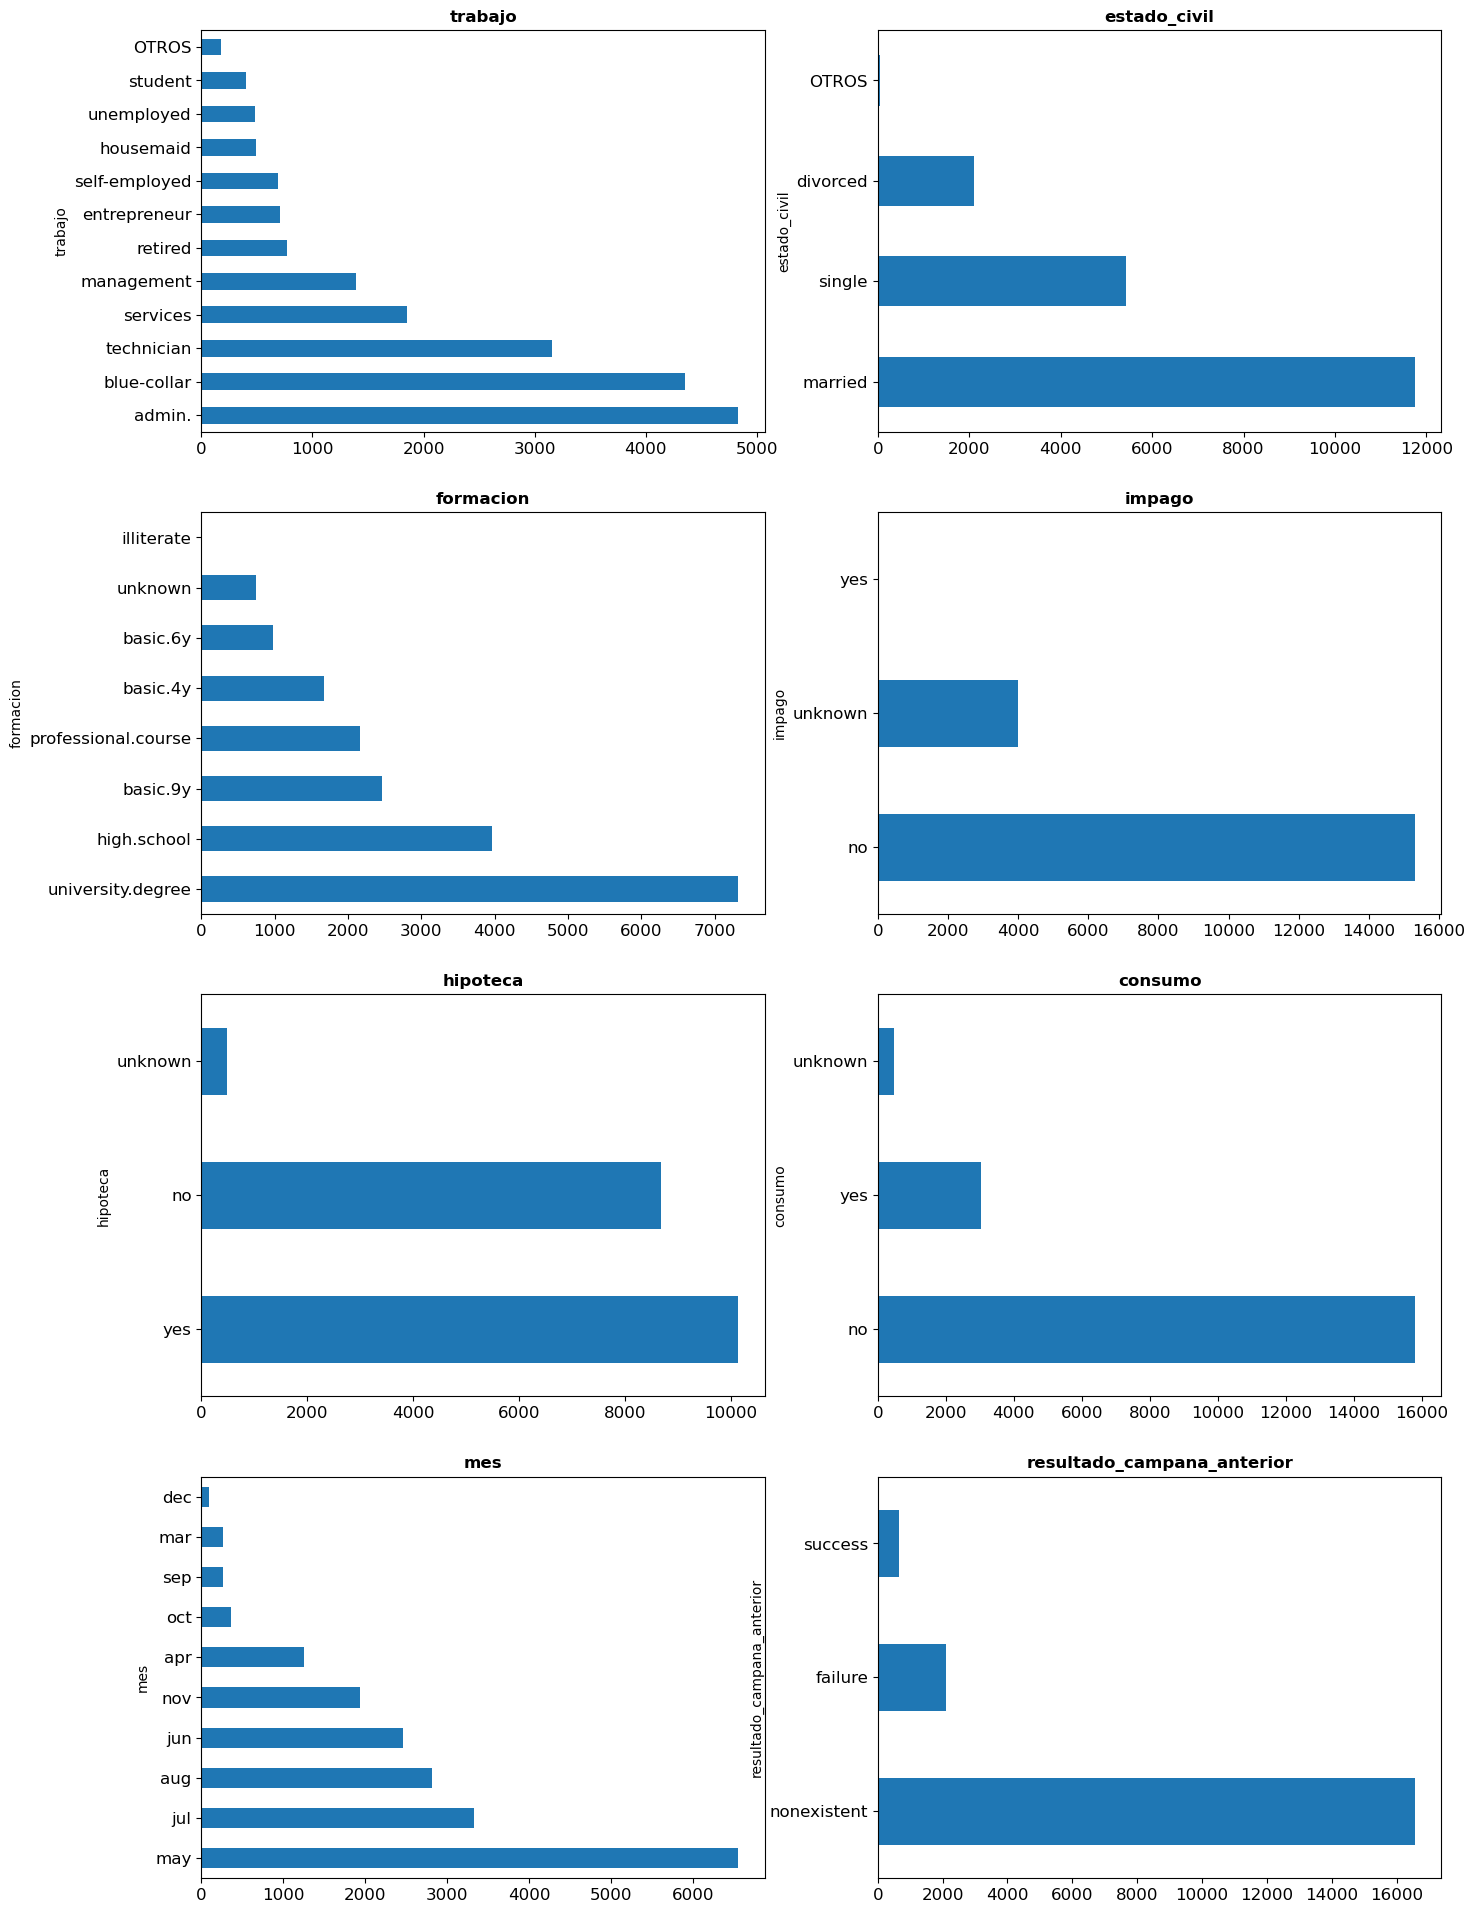

In [9]:
graficos_eda_categoricos(cat)

### EDA NUMÉRICAS

#### ANÁLISIS ESTADÍSTICO

In [10]:
def estadisticos_cont(num):
    # Calculamos describe
    estadisticos = num.describe().T
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    # Lo devolvemos
    return(estadisticos)

In [11]:
estadisticos_cont(num) # Estadísticos descriptivos, hay que dedicar tiempo a entenderlos y analizarlos

,count,mean,median,std,min,25%,50%,75%,max
edad,19313.0,39.747838,38.0,9.608928,23.0,32.0,38.0,46.0,67.0
num_contactos_esta_campana,19313.0,2.394864,2.0,1.957592,1.0,1.0,2.0,3.0,11.0
num_dias_ultimo_contacto,19313.0,961.424947,999.0,189.453238,0.0,999.0,999.0,999.0,999.0
variacion_tasa_empleo,19313.0,-0.364625,10.0,12.902999,-20.0,-18.0,10.0,10.0,10.0
euribor3m,19313.0,3256.575053,4856.0,1938.357801,1.0,1281.0,4856.0,4961.0,5045.0
contrata_fondos,19313.0,0.115052,0.0,0.319093,0.0,0.0,0.0,0.0,1.0


#### ANÁLISIS GRÁFICO

In [12]:
def graficos_eda_continuas(num):
    
    # Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

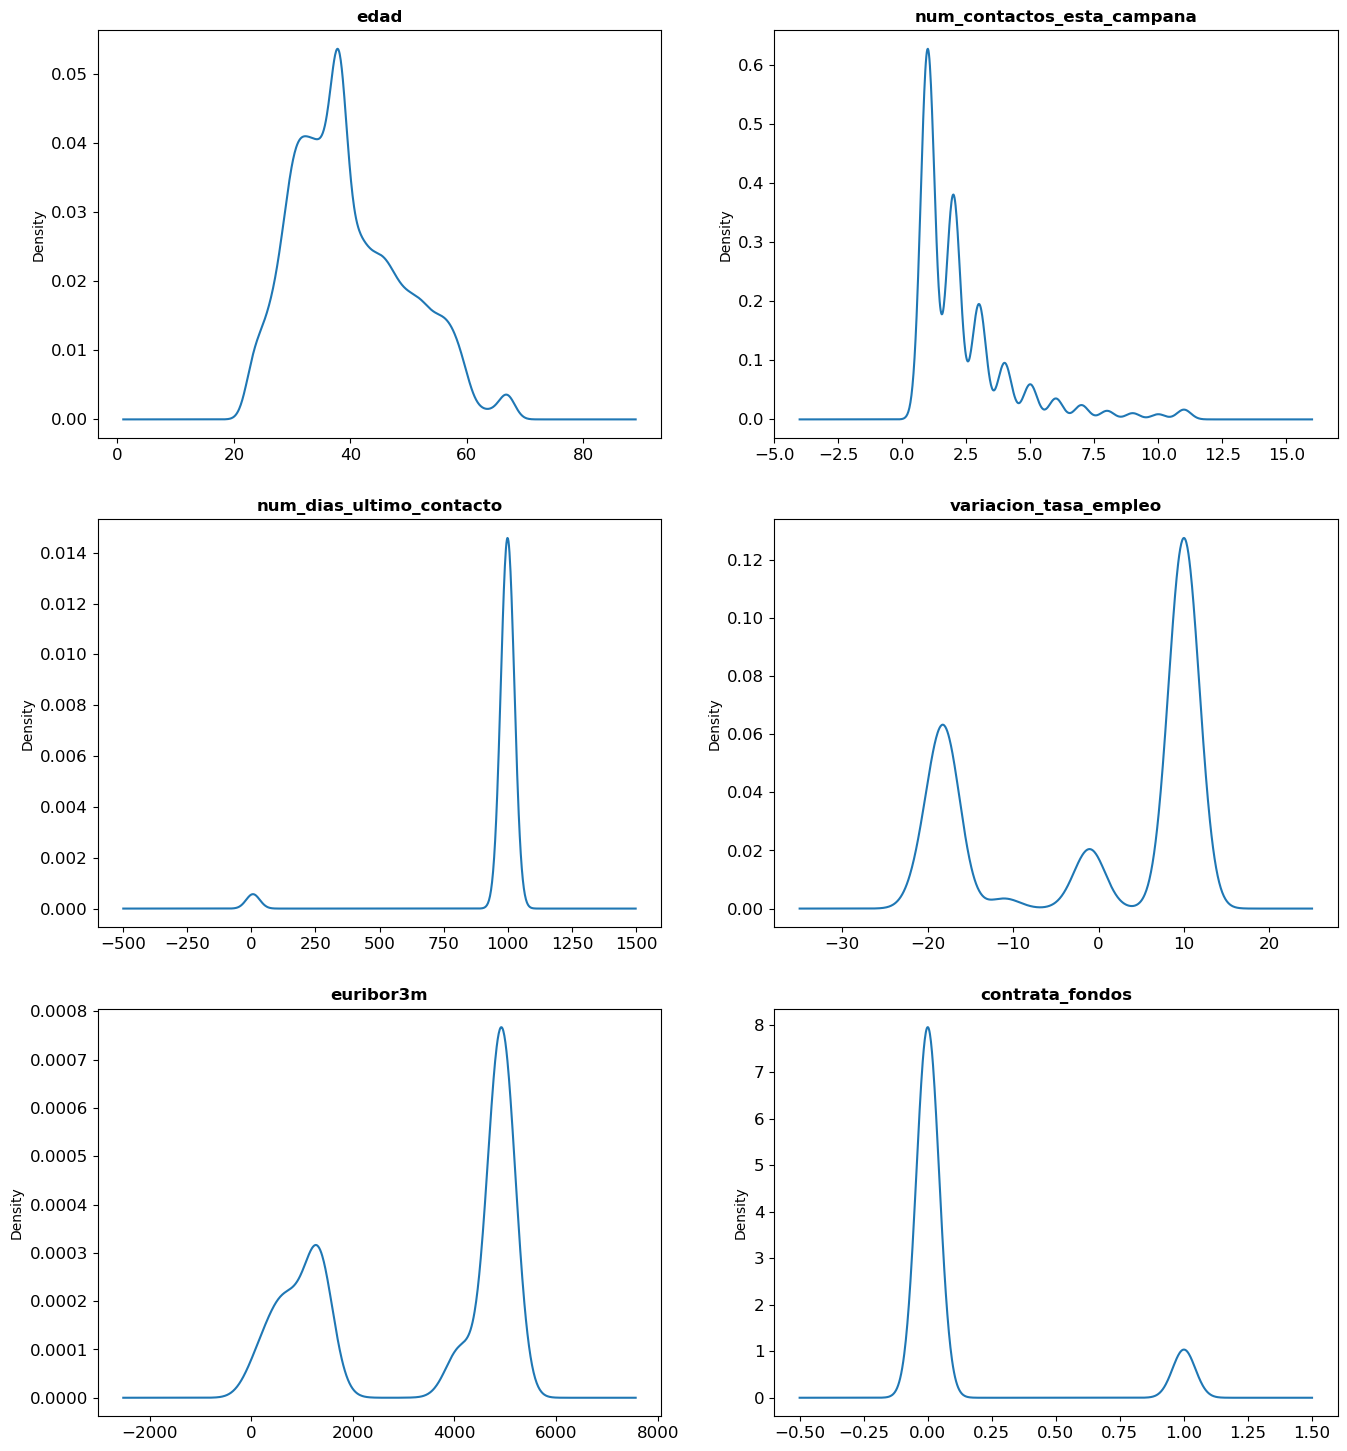

In [13]:
graficos_eda_continuas(num)

### GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [14]:
# Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [15]:
# Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)